In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Activation, Input, Dropout
from keras import Sequential

from sklearn.model_selection import train_test_split as tts, StratifiedKFold as skf

from utils import format_ppm_x

In [38]:
num_prev_vals = 7

In [39]:
data = format_ppm_x(pd.read_csv('../data/ppm.csv'), num_prev_vals)

X = data.iloc[:, data.columns != 0]

Y = data[0]

checkpoint 1


In [40]:
Y.head()

0    321.37
1    322.18
2    323.05
3    324.62
4    325.68
Name: 0, dtype: float64

In [41]:
model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='relu', input_shape=(num_prev_vals,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=8, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=1, activation='relu'),
    ]
)

model.compile(optimizer='Adagrad', loss='mae', metrics=['mae'])
X_train, X_test, Y_train, Y_test = tts(X, Y)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=5,
    epochs=150
)

Epoch 1/150
9/9 [==============================] - 1s 75ms/step - loss: 238.4923 - mae: 238.4923 - val_loss: 61.4174 - val_mae: 61.4174
Epoch 2/150
9/9 [==============================] - 1s 60ms/step - loss: 70.0588 - mae: 70.0588 - val_loss: 75.0961 - val_mae: 75.0961
Epoch 3/150
9/9 [==============================] - 1s 59ms/step - loss: 51.9130 - mae: 51.9130 - val_loss: 63.9913 - val_mae: 63.9913
Epoch 4/150
9/9 [==============================] - 1s 61ms/step - loss: 44.6249 - mae: 44.6249 - val_loss: 46.9443 - val_mae: 46.9443
Epoch 5/150
9/9 [==============================] - 1s 61ms/step - loss: 36.8151 - mae: 36.8151 - val_loss: 26.3215 - val_mae: 26.3215
Epoch 6/150
9/9 [==============================] - 1s 61ms/step - loss: 31.2824 - mae: 31.2824 - val_loss: 4.7259 - val_mae: 4.7259
Epoch 7/150
9/9 [==============================] - 1s 62ms/step - loss: 29.2988 - mae: 29.2988 - val_loss: 22.2162 - val_mae: 22.2162
Epoch 8/150
9/9 [==============================] - 1s 68ms/ste

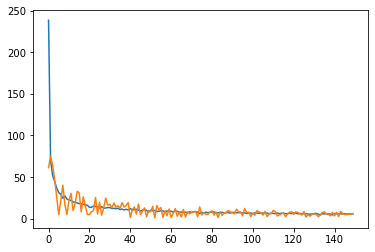

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [44]:
print(sum(val_loss:= history.history['val_loss'][-10:])/len(val_loss))

5.561943554878235
